In [1]:
!pip3 install opencv-python

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
print(cv2.__version__)


4.8.1


In [3]:
DATADIR="/Users/user/Downloads/archive/Indian/"

In [4]:
CATEGORIES=["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z"]

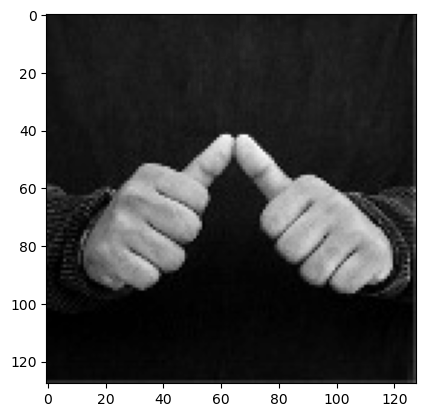

In [5]:
for category in CATEGORIES:
    path=os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap='gray')
        plt.show()
        break
    break 

In [6]:
print(img_array)


[[12 15 15 ... 11  9 32]
 [12 15 15 ...  9  8 31]
 [12 15 15 ... 10 11 33]
 ...
 [ 3  3  3 ... 14 15 35]
 [ 4  4  4 ... 15 15 33]
 [27 26 26 ... 36 35 52]]


In [7]:
print (img_array.shape)

(128, 128)


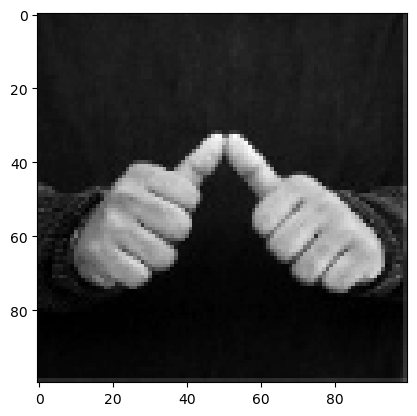

In [8]:
IMG_SIZE=100
new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap='gray')
plt.show()

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

training_data = []
DATADIR="/Users/user/Downloads/archive/Indian/"
CATEGORIES=["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z"]
def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
create_training_data()

print(len(training_data))          

100%|██████████| 1200/1200 [00:01<00:00, 1198.14it/s]

31945


In [10]:
import random

random.shuffle(training_data)
for sample in training_data[:45]:
    print(sample[1])

17
19
2
7
24
15
0
1
2
12
15
0
12
22
3
13
21
7
1
12
10
21
13
9
14
21
15
11
13
18
12
17
7
14
21
10
21
22
25
2
21
2
4
13
19


In [11]:
O = []
P = []

for features,label in training_data:
    O.append(features)
    P.append(label)

print(O[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

O = np.array(O).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[22]
   [25]
   [25]
   ...
   [45]
   [45]
   [57]]

  [[21]
   [25]
   [26]
   ...
   [47]
   [45]
   [54]]

  [[22]
   [25]
   [26]
   ...
   [45]
   [43]
   [57]]

  ...

  [[21]
   [21]
   [20]
   ...
   [19]
   [17]
   [34]]

  [[22]
   [19]
   [21]
   ...
   [17]
   [17]
   [35]]

  [[39]
   [40]
   [39]
   ...
   [37]
   [34]
   [48]]]]


In [12]:
import pickle

pickle_out = open("O.pickle","wb")
pickle.dump(O, pickle_out)
pickle_out.close()
pickle_out = open("P.pickle","wb")
pickle.dump(P, pickle_out)
pickle_out.close()

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import pickle
import numpy as np

pickle_in = open("O.pickle", "rb")
O = pickle.load(pickle_in)

pickle_in = open("P.pickle", "rb")
P = pickle.load(pickle_in)

O = np.array(O)
P = np.array(P)

O = O / 255.0

model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=O.shape[1:]))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(26))
model.add(Activation('softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])




hist = model.fit(O, P, batch_size=32, epochs=50, validation_split=0.2)


Epoch 1/50


799/799 [==============================] - 759s 936ms/step - loss: 0.0199 - accuracy: 0.9955 - val_loss: 4.9326e-04 - val_accuracy: 1.0000
Epoch 2/50
799/799 [==============================] - 472s 591ms/step - loss: 9.6804e-04 - accuracy: 0.9997 - val_loss: 6.2061e-05 - val_accuracy: 1.0000
Epoch 3/50
799/799 [==============================] - 472s 591ms/step - loss: 6.0948e-05 - accuracy: 1.0000 - val_loss: 7.0255e-06 - val_accuracy: 1.0000
Epoch 4/50
799/799 [==============================] - 1264s 2s/step - loss: 2.3513e-05 - accuracy: 1.0000 - val_loss: 3.4398e-06 - val_accuracy: 1.0000
Epoch 5/50
799/799 [==============================] - 472s 590ms/step - loss: 0.0071 - accuracy: 0.9989 - val_loss: 0.0024 - val_accuracy: 0.9995
Epoch 6/50
799/799 [==============================] - 688s 861ms/step - loss: 9.1269e-04 - accuracy: 0.9998 - val_loss: 0.0236 - val_accuracy: 0.9944
Epoch 7/50
799/799 [==============================] - 540s 676ms/step - loss: 7.5193e-05 - a

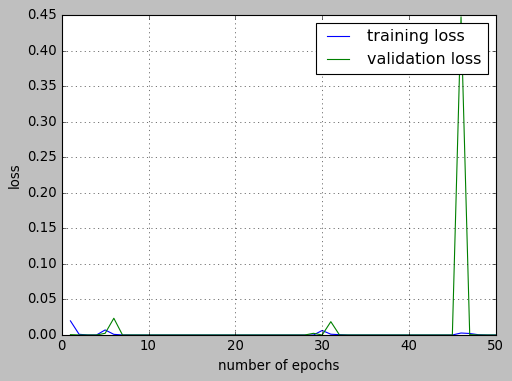

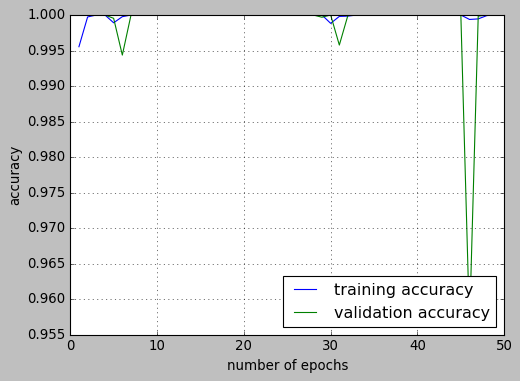

In [25]:
import matplotlib.pyplot as plt

# Assuming the number of epochs is 50
epochs = 50

train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
train_acc = hist.history['accuracy']  # Change 'acc' to 'accuracy'
val_acc = hist.history['val_accuracy']  # Change 'val_acc' to 'val_accuracy'

# Correct the range for the number of epochs
xc = range(1, epochs + 1)

plt.figure(1, figsize=(7, 5))
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)
plt.xlabel('number of epochs')
plt.ylabel('loss')
plt.grid(True)
plt.legend(['training loss', 'validation loss'], loc=1)
plt.style.use(['classic'])

plt.figure(2, figsize=(7, 5))
plt.plot(xc, train_acc)
plt.plot(xc, val_acc)
plt.xlabel('number of epochs')
plt.ylabel('accuracy')
plt.grid(True)
plt.legend(['training accuracy', 'validation accuracy'], loc=4)
plt.style.use(['classic'])

# Display the plots
plt.show()


In [24]:
model.save('Sign Language Detection.keras') 

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('Sign Language Detection.keras')  # Replace 'your_model.h5' with the actual path to your trained model file

# Define the labels for your classes
class_labels = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"] # Replace with your actual class labels

# Open the webcam
cap = cv2.VideoCapture(0)  # 0 represents the default camera (you can change it if you have multiple cameras)

while True:
    # Read a frame from the webcam
    ret, frame = cap.read()

    # Preprocess the frame (resize, normalize, etc.)
    # Make sure it matches the preprocessing used during training

    # Your preprocessing code goes here
    # ...

    # Make predictions using the trained model
    input_data = np.expand_dims(frame, axis=0)
    predictions = model.predict(input_data)

    # Get the predicted class index
    predicted_class = np.argmax(predictions)

    # Get the predicted class label
    predicted_label = class_labels[predicted_class]

    # Display the frame with the predicted label
    cv2.putText(frame, predicted_label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.imshow('Webcam', frame)

    # Break the loop if 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close the OpenCV window
cap.release()
cv2.destroyAllWindows()


NameError: name 'n' is not defined